In [1]:
# Plotting the summary lightcurve files produced by rhsi_flstat_sumltc.pro
# 
# 16-Dec-2020 IGH

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as io
from sunpy.io.special.genx import read_genx
from sunpy.time import parse_time
from astropy.time import Time
import astropy.units as u

import warnings
warnings.simplefilter('ignore')

In [3]:
# Load in the flare list
res=read_genx('bet_mfdata_a0gd.genx')
res=res["SAVEGEN0"]

In [4]:
# which flare?
fid=10# 10
start_time=parse_time(res['START_TIME'][fid], format='utime')
peak_time=parse_time(res['PEAK_TIME'][fid], format='utime')
end_time=parse_time(res['END_TIME'][fid], format='utime')
back_timer=parse_time(res['BK_TIMER'][fid], format='utime')

In [5]:
year=start_time.iso[:4]
mnth=start_time.iso[5:7]
day=start_time.iso[8:10]
hr=start_time.iso[11:13]
mn=start_time.iso[14:16]
sec=start_time.iso[17:19]
fdir=year+'/'+mnth+'/'+day+'/'
fname='sumltc_'+year+mnth+day+hr+mn+'.dat'
print(fdir+fname)

2002/02/18/sumltc_200202181841.dat


In [6]:
mdir='/scratch/trifid/iain/rfl_a0/data_ltc/'
sumdata=io.readsav(mdir+fdir+fname)

In [7]:
print(sumdata.keys())

dict_keys(['times', 'countrate', 'id_number', 'saa_flag', 'ecl_flag', 'flr_flag', 'atn_flag', 'dets_ind', 'dets_id', 'engs_id'])


In [8]:
# print(sumdata['times'][0])
# print(sumdata['countrate'][0])
# print(sumdata['dets_id'])
# print(sumdata['engs_id'])
# print(sumdata['saa_flag'])

In [9]:
# To get rid of the b at the start of the times
times=[]
for tt in sumdata['times']:
    times.append(tt.decode('utf-8'))
# Also get info about detectors used to make the ltc data
dets=sumdata['dets_ind'].decode('utf-8')
# print(dets)
idnum=f'{sumdata["id_number"]}'

In [10]:
# For plotting need to put into actual times not strings
# Start by putting in to astropy time format (most control)
atimes=Time(times, format = 'isot')
# Then convert to something matplotlib understands
mtimes = matplotlib.dates.date2num(atimes.datetime)
# Is this the most efficient way of doing this.....

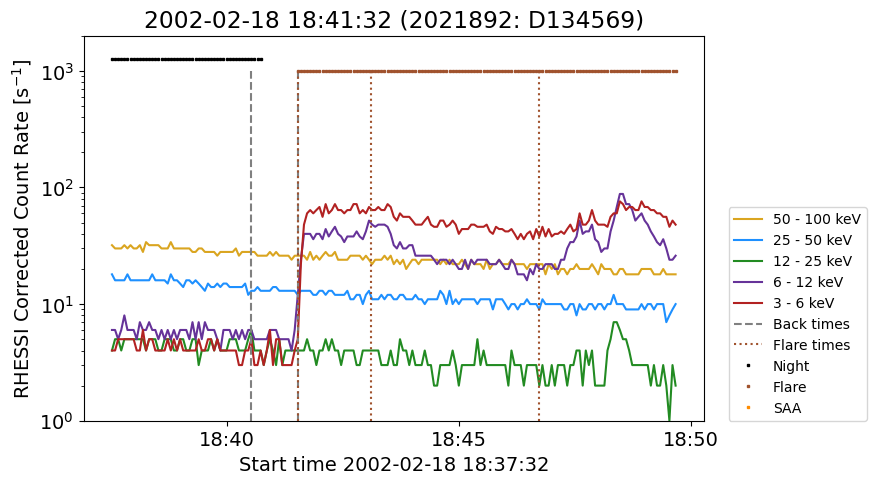

In [11]:
plt.rcParams.update({'font.size': 14})
ylim=[1,2e3]
fig,ax= plt.subplots(figsize=(8, 5))

plt.plot_date(mtimes,sumdata['countrate'][:,4],'-',color='goldenrod',\
             label=sumdata['engs_id'][4].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,3],'-',color='dodgerblue',\
             label=sumdata['engs_id'][3].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,2],'-',color='forestgreen',\
             label=sumdata['engs_id'][2].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,1],'-',color='rebeccapurple',\
             label=sumdata['engs_id'][1].decode('utf-8'))
plt.plot_date(mtimes,sumdata['countrate'][:,0],'-',color='firebrick',\
             label=sumdata['engs_id'][0].decode('utf-8'))
# Plot the flare start, end and peak times and background times
btims=[back_timer[0].datetime,back_timer[1].datetime]
plt.vlines(btims,ylim[0],1e3,label='Back times',linestyle='dashed',color='grey')
ftims=[start_time.datetime,peak_time.datetime,end_time.datetime]
plt.vlines(ftims,ylim[0],1e3,label='Flare times',linestyle='dotted',color='sienna')

# Now only plot where the flag is == 1
plt.plot_date(mtimes[sumdata['ecl_flag']==1],\
              sumdata['ecl_flag'][sumdata['ecl_flag']==1]*10**3.1,'s',color='black',\
             label='Night',markersize=2)
plt.plot_date(mtimes[sumdata['flr_flag']==1],\
              sumdata['flr_flag'][sumdata['flr_flag']==1]*10**3.0,'s',color='sienna',\
             label='Flare',markersize=2)
plt.plot_date(mtimes[sumdata['saa_flag']==1],\
              sumdata['saa_flag'][sumdata['saa_flag']==1]*10**3.15,'s',color='darkorange',\
             label='SAA',markersize=2)
plt.title(start_time.iso[:19]+' ('+idnum+': D'+dets+')')
plt.ylim(ylim)
plt.yscale('log')
plt.xlabel('Start time '+atimes[0].iso[:-4])
plt.ylabel('RHESSI Corrected Count Rate [s$^{-1}$]')
plt.legend(loc=(1.04,0), prop={'size': 10})
# The following should give HH:MM for the axis formate
myFmt = matplotlib.dates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
fig.show()

In [12]:
# Double check the same event via their id numbers
print(res["ID_NUM"][fid])
print(sumdata["ID_NUMBER"])

2021892
2021892
